# Automatic differentiation
We use automatic differentiation to compute the gradient automatically, saving us the trouble of writing the calculations by hand.

### Elves' execution (everything by hand)
[picture]

Elves have a lot of time to waste, since they are basically immortal. If you are too, you are allowed to ignore automatic differentiation...

### The static computational graph (deferred execution)
[picture]

The neuron gets compiled into a symbolic graph in which each node represents individual operations (second row), using placeholders for inputs and outputs

### The dynamic computational graph (immediate execution)
[picture]

The computational graph is built node by node as the code is eagerly evaluated. It easier to accomplish conditional behavior, since the CG can change during successive forward passes.

In [62]:
import torch
a = torch.tensor([[1., 2], [3, 4]], requires_grad=True)
b = torch.ones((2, 2), requires_grad=True)
a, b

(tensor([[1., 2.],
         [3., 4.]], requires_grad=True),
 tensor([[1., 1.],
         [1., 1.]], requires_grad=True))

In [94]:
c = a + b
d = b * c
d = d + a
d.retain_grad()

In [95]:
c.requires_grad

True

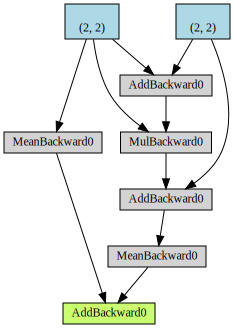

In [96]:
from torchviz import make_dot
e = torch.mean(d) + torch.mean(b)
make_dot(e)

In [97]:
e.backward()
# for memory efficiency, the graph is deleted during the backward
# e.backward() # error

# if we want not the graph to be freed, specify retain_graph=True 

In [98]:
b.grad # it is a leaf of the graph

tensor([[3.0000, 4.7500],
        [6.5000, 8.2500]])

In [99]:
c.grad # it is not a leaf

In [100]:
d.grad # it is not a leaf, but has the attribute retains_grad=True

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [101]:
# Dynamic graph - (define-by-run)
# it reminds of the difference between Python variables and C variables
x = torch.tensor([1., 2.], requires_grad=True)
y = x.sum()

while y.data.norm() < 12:
    y = y * 1.2

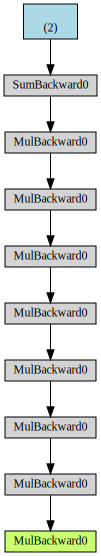

In [103]:
make_dot(y)

In [104]:
y.backward()

In [105]:
x.grad

tensor([4.2998, 4.2998])

In [115]:
# you cannot get a numpy array from a tensor which requires grad
# x.numpy() # error

# we must detach it from the computational graph
print(x)
print(x.detach())
print(x.detach().numpy())

tensor([1., 2.], requires_grad=True)
tensor([1., 2.])
[1. 2.]


In [116]:
# both detach() and numpy() are both views on the same storage
x_dn = x.detach().numpy()
x[0] = 99
print(x_dn)

[99.  2.]


## Resources
https://openreview.net/pdf?id=BJJsrmfCZ

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf